## BuildSimulation class

This is a detailed guide for using sw_openmm python module to run openmm simulations each function is explained here alongside examples.

In [1]:
import parmed as pm
import numpy as np
import pandas as pd
import csv
import itertools

/tmp/ipykernel_104696/85844301.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# sw_openmm includes the classes, BuildSimulation, ANISimulation, AmberSimulation
# BuildSimulation is the parent class of ANI/Amber - Simulation
from modules.sw_openmm import *

# sw_directories is a filepath manager and will be explained in its own guide more in depth.
from modules.sw_directories import *

### Define topology and coordinate files

First we define an amber topology and coordinate file. These are generated using the paramaterization codes. <br>

We can use these files to set up simulations and run them. <br>

##### Note: You may need to change the filepaths to where the files are located in your own PC.

In [3]:
# Manual way to set filepaths to topology and coordinate files
topology_file = "pdb_files/systems/3HB_monomer/3HB_monomer_2_2_array.prmtop"
coordinate_file = "pdb_files/systems/3HB_monomer/3HB_monomer_2_2_array.rst7"

We can also use the driectory path manager to retrieve these files for a specified system - these functions will be explained in the **filepath_manager_guide.ipynb**

In [4]:
# Method of retrieving topology and coordinate files for a system using a function from the 'PolymerSimulatorDirs' class
main_dir = !pwd
main_dir = main_dir[0]
directories = PolymerSimulatorDirs(main_dir)
topology_file, coordinate_file = directories.retrieve_top_crds(directories, "3HB_monomer_3_3_array")

### Investigate class

Before carrying out any simulations or even setting them up, lets see what the simulation class includes. <br>

Calling 'help(class)' will show the contents of each class, here we will investigate 3 classes: <br>

    - BuildSimulation: Class containing methods to run simulations (i.e. production, annealing, equilibration)
    - AmberSimulation: Class inheriting methods from BuildSimulation but also contains method to set up simulations using Amber topologies and parameters.
    - ANISimulation: Class inheriting methods from BuildSimulation but also contains method to set up simulations using and use ANI forcefields.

In [5]:
# Shows the functions and varaibles contained inside the BuildSimulation class
print(help(BuildSimulation))

Help on class BuildSimulation in module modules.sw_openmm:

class BuildSimulation(builtins.object)
 |  Class for building and managing molecular simulations.
 |
 |  Attributes:
 |      pressure (float): The default pressure for simulations, in atmospheres.
 |      temp (float): The default temperature for simulations, in Kelvin.
 |      timestep (float): The default timestep for simulations, in femtoseconds.
 |      friction_coeff (float): The default friction coefficient for Langevin dynamics simulations, in units of 1/picoseconds.
 |      total_steps (int): The default total number of steps for simulations.
 |      reporter_freq (int): The default frequency for reporting data during simulations.
 |      anneal_parameters (list): Parameters for simulated annealing, including start temp, max temp, cycles, holding steps,
 |          and steps at each temperature.
 |
 |  Methods:
 |      type_of_simulation(self): Determine the type of simulation.
 |      minimize_energy(self): Perform en

In [6]:
# Shows the functions and varaibles contained inside the AmberSimulation class
print(help(AmberSimulation))

Help on class AmberSimulation in module modules.sw_openmm:

class AmberSimulation(BuildSimulation)
 |  AmberSimulation(topology_file, coordinates_file)
 |
 |  Method resolution order:
 |      AmberSimulation
 |      BuildSimulation
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, topology_file, coordinates_file)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __str__(self)
 |      Return str(self).
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from BuildSimulation:
 |
 |  __repr__(self)
 |      Return repr(self).
 |
 |  anneal(self, directories, simulation, start_temp=None, max_temp=None, cycles=None, holding_steps=None, steps_at_temp=None)
 |      Function to perform simulated annealing on the provided simulation system.
 |
 |      USAGE:
 |          annealed_sim = sim.anneal(simulation, start_temp, max_temp, cycles, holding_steps, steps_at_temp)
 |
 |      Recommended USAGE:


In [7]:
# Shows the functions and varaibles contained inside the ANISimulation class
print(help(ANISimulation))

Help on class ANISimulation in module modules.sw_openmm:

class ANISimulation(BuildSimulation)
 |  ANISimulation(input_file)
 |
 |  Method resolution order:
 |      ANISimulation
 |      BuildSimulation
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, input_file)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __str__(self)
 |      Return str(self).
 |
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |
 |  set_potential(potential) from builtins.type
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  potential = 'ani2x'
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from BuildSimulation:
 |
 |  __repr__(self)
 |      Return repr(self).
 |
 |  anneal(self, directories, simulation, start_temp=None, max_temp=None, cycles=None, holding_steps=None, s

### Initialize simulation object

Here we call "AmberSimulation" and pass the topology and coordinate file as arguments. <br>

The simulation loads with some default parameters related to simulations (temp, timestep, pressure...) - we can change as we need (more on this further down).

In [8]:
# Initiates simulation object with given topology and coordinate files
sim = AmberSimulation(topology_file, coordinate_file)

There are some useful methods to check the type of simulation and the parameters. <br>

repr(sim) - this will return the current simulation parameters given. <br>
str(sim) - this will return the type of object our simulation is.



In [9]:
# Prints out the parameters defined for simulations
repr(sim)

Simulation parameters: ('1', '300', '2.0, 1.0, 1000, 1000')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

In [10]:
# Prints out the type of simulation and what system is in the simulation object
str(sim)

'Amber simulation object of - 3HB_monomer_3_3_array'

The timestamp of when the simulation was initiated can also be printed

In [11]:
sim.display_start_time()

Simulation initiated at:  2024-04-19_174559


 ## Setting parameters
 
 The list of parameters we can change is: <br>
> temperature <br>
> pressure <br>
> timestep <br>
> friction coeffiecient (you should not need to change this) <br>
> total steps <br>
> reporter freqeuncy <br>
> annealing parameters <br>
     
##### What is the friction coefficient? 
This is a parameter that indicates the strength of the coupling between the heat bath and the system being simulated. This parameter determines how quickly a particles velocity relaxes toward equilibrium. Don't alter this value unless you have a good reason to!

We can check our parameters by running: **simulation_object.parameter**. The list of parameters are: <br>
- sim.temp
- sim.pressure
- sim.timestep
- sim.friction_coeff
- sim.total_steps
- sim.reporter_freq
- sim.anneal_parameters

In [12]:
sim.temp, sim.pressure, sim.timestep, sim.friction_coeff, sim.total_steps, sim.reporter_freq

(300, 1, 2.0, 1.0, 1000, 1000)

We can also look at our annealing parameters

In [13]:
sim.anneal_parameters

[300, 700, 5, 3000, 100]

Now lets set some new parameters by running: **simulation_object.set_parameter(new_parameter)**

In [14]:
sim.set_temperature(400)

Temperature set to:  400 kelvin


In [15]:
sim.set_pressure(2)

Pressure set to:  2  atmospheres


In [16]:
sim.set_friction_coeff(1.0)

Friction coeffiecent set to:  1.0


In [17]:
sim.set_total_steps(20000)

Total steps for simulation set to:  20000


In [18]:
sim.set_reporter_freq(100)

Reporter frequency set to every:  100  steps


Setting the parameters of annealing is the only method of setting parameters that is different. Here, we require a list of parameters - for example I will pass a single number to it.

In [19]:
sim.set_anneal_parameters([2])

ValueError: Invalid parameters provided. Expected format: [start_temp, max_temp, cycles, holding_steps, steps_at_temp]

We see an error that expected our parameters in a different format; **[start_temp, max_temp, cycles, holding_steps, steps_at_temp]** <br>

**These parameters are:** <br>
> *start_temp*: the starting temperature of each annealing cycles <br>
> *max_temp*: the target temperature of each annealing cycle <br>
> *cycles*: the number of annealing cycles <br>
> *holding_steps*: the number of steps spent at the start_temp and max_temp during cylces <br>
> *steps_at_temp*: the number of steps spent at each individual temperature during heating/cooling <br> 
    

It is a good idea to set the start temp to the same temperature as the simulation.

##### Why do we have holding steps?

These aren't explicitly necessary, but ensure the simulation spends more than a few steps at the target temperature.

In [20]:
# Display help for setting annealing parameter - currently not working
sim.set_anneal_parameters_help()

None


In [21]:
# Function to set annealing paramters in the format: sim.set_anneal_parameters([start_temp, target_temp, cycles, steps_at_target_temp, steps_at_each temp])
sim.set_anneal_parameters([sim.temp, 700, 5, 1000, 100])

Anneal parameters set.
Starting temperature is:  400
Target temperature is:  700
Number of annealing cycles is:  5
Steps at target/start temperature is:  1000
Steps at each incremental temperature is:  100


Now we can check our new parameters by running: **repr(sim)**

In [22]:
# Prints out the parameters defined for simulations (this will not display annealing parameters)
repr(sim)

Simulation parameters: ('1', '400', '2.0, 1.0, 20000, 100')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

## Running simulations

### Minimize energy

Minimizing the energy of a system and finds the local minimum energy of the system and ensures a good starting structure. <br>

This step is run with: **simulation_object.minimize_energy()**

### Annealing

Annealing ramps the temperature of the system to a given target temperature in a given number of cycles. This allows for components within the system to be mixed well and start from non-biased positions. This is an NVT ensemble. <br>

This step is run with: **simulation.anneal()** <br>

This uses the annealing parameters that were set with **sim.set_anneal_parameters(start_temp, max_temp, cycles, holding_steps, steps_at_temp)** <br>

***Important:*** You can override the parameters set into the simulation object by specifying then individually when you are annealing the system. Howver, it is recommended to set the parameters and then anneal system in seperate steps.* <br>

**simulation.anneal(start_temp, max_temp, cycles, holding_steps, steps_at_temp)** <br>

*Note: sometimes you will not want to anneal a system - in cases where you want to investigate your starting structure and not a randomly distributed system*

### Equilibration

Equilibration applies pressure to a system and allows it to *equilibrate* to the correct density for that given pressure. This ensures our system starts from the correct density and the volume of our system is correct. This is an NPT ensemble .<br>

*Note: it is key to check the density of your simulation after equilibration against any experimental data where possible*

### Production run

The production is the **meat** of the simulation. At this stage we have a minimized, equilibrated (and in some cases) and annealed a system; it is time to run a longer NVT simulation to see how the system evolves over a given period of time. These are the results we will analyse.

#### Recommended recipes

For a molecular dynamic simulation, you will want to create a *recipe*. This is series of steps you are taking to reach and run the production run.

1. Minimization --> Annealing -- > Equilibration --> Production run <br>
**For use with complex mixtures of molecules**<br>
2. Minimization --> Equilibration --> Produciton run <br>
**For use with systems where the initial structure is to be investigated**

### Help

If you are unsure about the use of a function, helper functions can let us see how to use the function.

In [23]:
# Display help for minimize energy method
sim.minimize_energy_help()


        Function to perform energy minimization of the system using Langevin dynamics.
        
        USAGE:
            minimized_sim = simulation_object.minimize_energy()

        Returns:
            minimized_simulation_object
        


In [24]:
# Display help for running a simulated annealing of a given system
sim.anneal_help()


        Function to perform simulated annealing on the provided simulation system.
        
        USAGE: 
            annealed_sim = sim.anneal(simulation, start_temp, max_temp, cycles, holding_steps, steps_at_temp)            
        
        Recommended USAGE:
            annealed_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following function:
                
            simulation_object.set_anneal_parameters([start_temp, max_temp, cycles, holding_steps, steps_at_each_temp])
        
        Args:
            simulation (app.Simulation): The simulation object to perform annealing on.
            
            start_temp (float, optional): The starting temperature for annealing in Kelvin. Defaults to None, 
                in which case the value is fetched from self.anneal_parameters[0].
                
            max_temp (float, optional): The maximum temperature for annealing in Kelvin. Defaults to None, 
               

In [25]:
# Display help for equilibrating a system with molecular dynamics
sim.equilibrate_help()


        Function to equilibrate the provided simulation to reach a specified temperature and pressure.
        
        USAGE: 
            equilibrated_sim = sim.anneal(simulation, total_steps, temp, pressure)            
        
        Recommended USAGE:
            equilibrated_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following functions:
                
            simulation_object.set_temperature(temperature)
            simulation_object.set_pressure(pressure)
            simulation_object.set_total_steps(total_steps)
            
        Args:
            simulation (app.Simulation): The simulation object to equilibrate.
            
            total_steps (int, optional): The total number of steps to run for equilibration. Defaults to None, 
                in which case the value is fetched from self.total_steps.
                
            temp (float, optional): The target temperature for equilibration in Kelvin

In [26]:
# Display help for the production run step of a molecular dynamics simulation
sim.production_run_help()


        Function to perform a production run simulation with the provided parameters.
        
        USAGE: 
            production_run_sim = sim.anneal(simulation, total_steps, temp)            
        
        Recommended USAGE:
            production_run_sim = sim.anneal(simulation)
            
            where annealing parameters are set with the following functions:
                
            simulation_object.set_temperature(temperature)
            simulation_object.set_total_steps(total_steps)
            
        Args:
            simulation (app.Simulation): The simulation object to run the production simulation on.
            
            total_steps (int, optional): The total number of steps to run for the production simulation. 
                Defaults to None, in which case the value is fetched from self.total_steps.
            
            temp (float, optional): The temperature for the production simulation in Kelvin. 
                Defaults to None, in wh

In [27]:
# Display help on how to use a function to generate graphs for the data
sim.graph_state_data_help()


        Function to generate a plot from simulation data and save it as a PNG file.
        
        USAGE:
            The variable used for this plot is the second element of the tuple coming from the following method:
                **anneal**
                **equilibrate**
                **production_run**
                
            sim.graph_state_data(returned_simulation_variable)
            
            An example of this returned_simulation_varaible is:
                sim.anneal(minimized_sim)[0]
        
        Args:
            data_file (str): The path to the CSV file containing simulation data.
            
        Notes:
            This method reads simulation data from a CSV file, creates plots for each column of data
            against time, and saves the resulting plot as a PNG file. The CSV file is expected to have
            a "Time (ps)" column and numerical data columns representing different states of the
            simulation over time.

            T

### Running simulations

One thing to note - the initial object we loaded (in this case "sim") is our simulation and is what we will call when setting parameters and calling functions. Any new variables we define (as in the next cell) such as **minimized sim** are just variables and are used for inputs into our new functions - this will make sense as we carry on!

In [28]:
# Minimize the energy of a system
minimized_sim = sim.minimize_energy()

In [29]:
# Set anneal parameters
sim.set_anneal_parameters([300, 500, 3, 1000, 10])

Anneal parameters set.
Starting temperature is:  300
Target temperature is:  500
Number of annealing cycles is:  3
Steps at target/start temperature is:  1000
Steps at each incremental temperature is:  10


When we carry out annealing, equilibration or a production run a tuple is returned: (simulation_object, simulation_data).<br>
The line below unpacks the tuple into 2 variabled **annealed_sim** and **annealed_sim_data** straight from the class method.

In [30]:
# Run an annealing simulation and retrieve the simulation and simulation data
annealed_sim, annealed_sim_data = sim.anneal(directories, minimized_sim)

Now we have unpacked our variable **annealed_sim_data** we can plot it using the built in state data plotter.

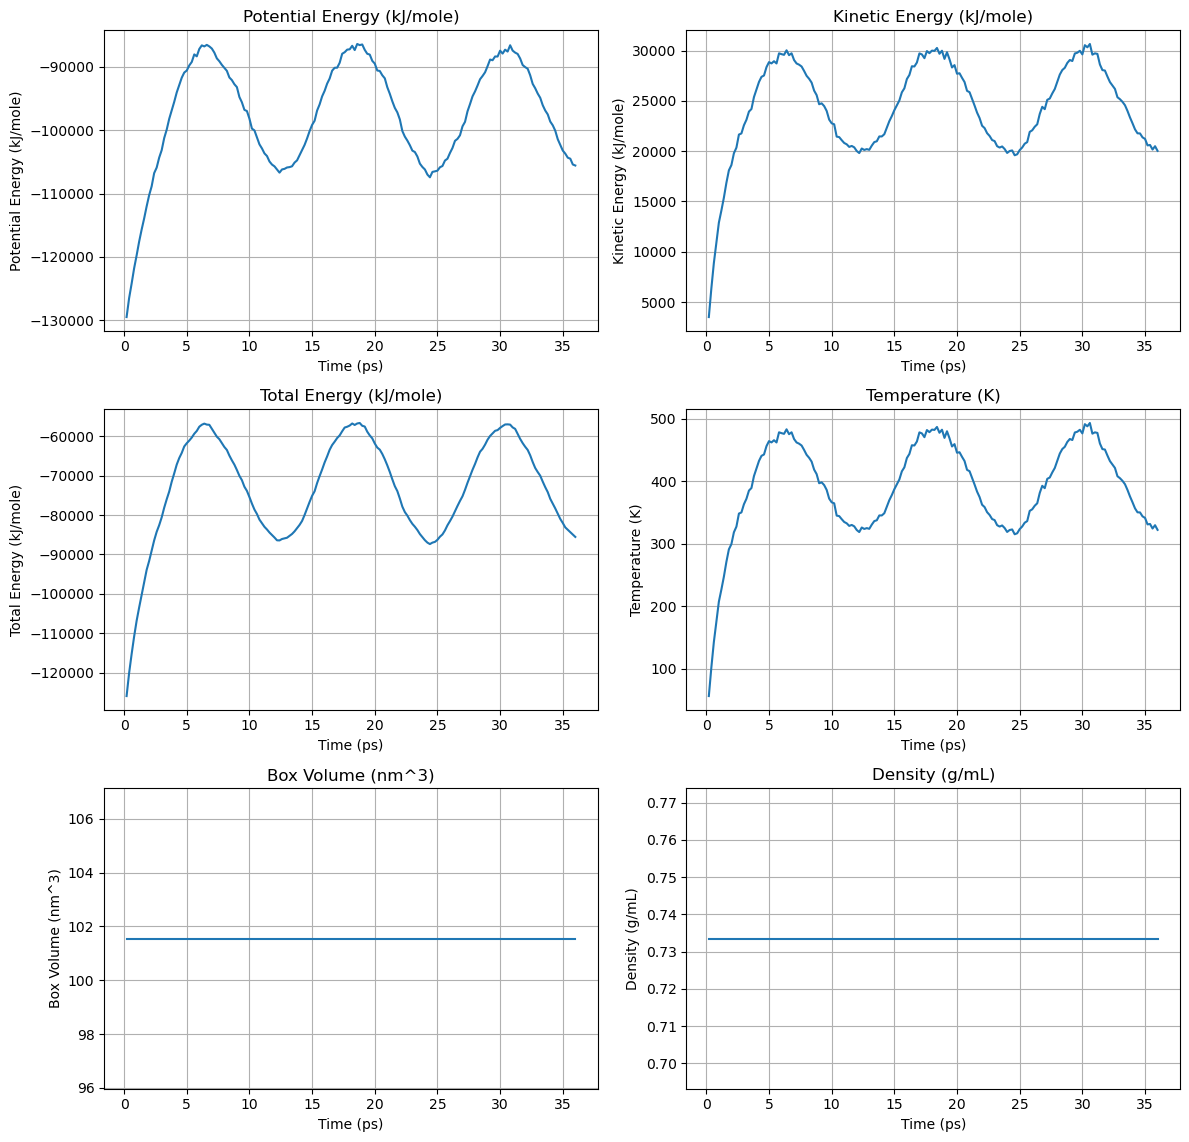

In [31]:
# Generate graphs for the annealing stage of the simulation
sim.graph_state_data(annealed_sim_data)

And we can use the **annealed_sim** variable for an input into the next stage of the simulation. <br>

But first, lets set some variables - we can check them first to see what we want to change.

In [32]:
repr(sim)

Simulation parameters: ('1', '400', '2.0, 1.0, 20000, 100')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

In [33]:
# Set some of the simulation parameters
sim.set_temperature(300)
sim.set_total_steps(50000)
sim.set_reporter_freq(100)
sim.set_pressure(1)

Temperature set to:  300 kelvin
Total steps for simulation set to:  50000
Reporter frequency set to every:  100  steps
Pressure set to:  1  atmospheres


In [35]:
# Run an equilibration simualtion and retrieve the simulation and simulation data
equilibrated_sim, equilibrated_sim_data = sim.equilibrate(directories, annealed_sim)

In [ ]:
# Generate graphs for the equilibration stage of the simulation
sim.graph_state_data(equilibrated_sim_data)

Now we can use the **equilibrated_sim** variable to run our production run.

In [ ]:
# Run a production simualtion and retrieve the simulation and simulation data
production_sim, production_sim_data = sim.production_run(equilibrated_sim)

In [ ]:
# Generate graphs for the production stage of the simulation
sim.graph_state_data(production_sim_data)